# <img src="https://img.icons8.com/external-flaticons-lineal-color-flat-icons/64/undefined/external-big-data-smart-technology-flaticons-lineal-color-flat-icons-2.png"/> **NLP Research <br>CRF Named Entity Recognition**
## <img src="https://img.icons8.com/external-fauzidea-flat-fauzidea/64/undefined/external-man-avatar-avatar-fauzidea-flat-fauzidea.png"/> **`Dimas Dwi Putra`**

# **Connect Google Drive Storage**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Requirements Python Libraries**

In [ ]:
! pip install scikit-learn==0.23.1
! pip install sklearn-crfsuite
! pip install seaborn
! pip install eli5

# **Import Python Libraries**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn_crfsuite.metrics import flat_f1_score, flat_classification_report
from sklearn_crfsuite import CRF
from sklearn_crfsuite import metrics
from sklearn.metrics import classification_report, make_scorer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import scipy.stats
import eli5

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
sns.set(font_scale=1)
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# **NER Dataset With POS Tagging**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Rearch_Dimas/CRF-NER/input/ner_dataset.csv', encoding = "ISO-8859-1")

## **Display 20 Data Pertama**

In [ ]:
df.head(20)

,Sentence #,Word,POS,Tag
0,Sentence: 0,studies,NNS,O
1,Sentence: 0,on,IN,O
2,Sentence: 0,magnesium,NN,O
3,Sentence: 0,s,NN,O
4,Sentence: 0,mechanism,NN,O
5,Sentence: 0,of,IN,O
6,Sentence: 0,action,NN,O
7,Sentence: 0,in,IN,O
8,Sentence: 0,digitalis,NN,plant
9,Sentence: 0,induced,VBD,O


## **Display 20 Data Terakhir**

In [ ]:
df.tail(20)

,Sentence #,Word,POS,Tag
31674,Sentence: 1309,of,IN,O
31675,Sentence: 1309,the,DT,O
31676,Sentence: 1309,variance,NN,O
31677,Sentence: 1309,in,IN,O
31678,Sentence: 1309,cannabis,NN,plant
31679,Sentence: 1309,use,NN,O
31680,Sentence: 1309,these,DT,O
31681,Sentence: 1309,findings,NNS,O
31682,Sentence: 1309,suggest,VBP,O
31683,Sentence: 1309,that,IN,O


## **Describe NER Data**

In [ ]:
df.describe()

,Sentence #,Word,POS,Tag
count,31694,31694,31694,31694
unique,1310,3089,32,3
top,Sentence: 267,and,NN,O
freq,101,930,9763,27882


## **Menghitung Jumlah Baris Dan Kolom**

In [ ]:
df.shape

(31694, 4)

## **Display Tag**

In [ ]:
df['Tag'].unique()

array(['O', 'plant', 'disease'], dtype=object)

## **Display POS**

In [ ]:
df['POS'].unique()

array(['NNS', 'IN', 'NN', 'VBD', 'DT', 'WDT', 'VBZ', 'RB', 'JJ', 'VBN',
       'CC', 'MD', 'VB', 'PRP$', 'CD', 'VBP', 'VBG', 'TO', 'EX', 'PRP',
       'WP', 'JJR', 'RBR', 'WRB', 'RP', 'JJS', 'FW', 'WP$', 'RBS', 'PDT',
       '$', 'NNP'], dtype=object)

## **Mengecek Null Data**

In [ ]:
df.isnull().sum()

Sentence #    0
Word          0
POS           0
Tag           0
dtype: int64

# **Class for get sentence. The each sentence will be list of tuples with tag and pos**

In [ ]:
class sentence(object):
    def __init__(self, df):
        self.n_sent = 1
        self.df = df
        self.empty = False
        agg = lambda s : [(w, p, t) for w, p, t in zip(s['Word'].values.tolist(), s['POS'].values.tolist(), s['Tag'].values.tolist())]
        self.grouped = self.df.groupby("Sentence #").apply(agg)
        self.sentences = [s for s in self.grouped]
        
    def get_text(self):
        try:
            s = self.grouped['Sentence: {}'.format(self.n_sent)]
            self.n_sent +=1
            return s
        except:
            return None

## **Displaying one full sentence**

In [ ]:
getter = sentence(df)
sentences = [" ".join([s[0] for s in sent]) for sent in getter.sentences]
sentences[1]

'the mechanism by which magnesium affects digitalis induced arrhythmias was studied in dogs with and without beta receptor'

## **Sentence with pos and tag**

In [ ]:
sent = getter.get_text()
print(sent)

[('the', 'DT', 'O'), ('mechanism', 'NN', 'O'), ('by', 'IN', 'O'), ('which', 'WDT', 'O'), ('magnesium', 'NN', 'O'), ('affects', 'VBZ', 'O'), ('digitalis', 'RB', 'plant'), ('induced', 'JJ', 'O'), ('arrhythmias', 'NN', 'disease'), ('was', 'VBD', 'O'), ('studied', 'VBN', 'O'), ('in', 'IN', 'O'), ('dogs', 'NNS', 'O'), ('with', 'IN', 'O'), ('and', 'CC', 'O'), ('without', 'IN', 'O'), ('beta', 'NN', 'O'), ('receptor', 'NN', 'O')]


In [ ]:
len(sentences[1])

121

## **Getting all the sentences in the dataset**

In [ ]:
sentences = getter.sentences

In [ ]:
print(sentences[1])

[('the', 'DT', 'O'), ('mechanism', 'NN', 'O'), ('by', 'IN', 'O'), ('which', 'WDT', 'O'), ('magnesium', 'NN', 'O'), ('affects', 'VBZ', 'O'), ('digitalis', 'RB', 'plant'), ('induced', 'JJ', 'O'), ('arrhythmias', 'NN', 'disease'), ('was', 'VBD', 'O'), ('studied', 'VBN', 'O'), ('in', 'IN', 'O'), ('dogs', 'NNS', 'O'), ('with', 'IN', 'O'), ('and', 'CC', 'O'), ('without', 'IN', 'O'), ('beta', 'NN', 'O'), ('receptor', 'NN', 'O')]


In [ ]:
words = list(set(df["Word"].values))
n_words = len(words)
print(n_words)

3089


# **Visualisasi**

## **Visualasi With Tag O**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


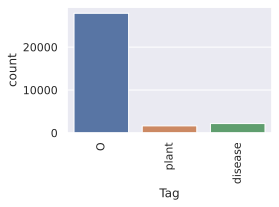

In [ ]:
plt.figure(figsize=(4, 3))
ax = sns.countplot('Tag', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
plt.tight_layout()
plt.show()

## **Visualisasi without Tag O**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


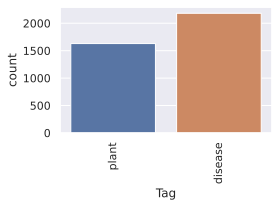

In [ ]:
plt.figure(figsize=(4, 3))
ax = sns.countplot('Tag', data=df.loc[df['Tag'] != 'O'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
plt.tight_layout()
plt.show()

## **Visualisasi POS**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


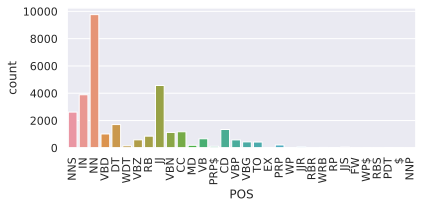

In [ ]:
plt.figure(figsize=(6, 3))
ax = sns.countplot('POS', data=df, orient='h')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
plt.tight_layout()
plt.show()

# **Feature Preparation**

In [ ]:
maxlen = max([len(s) for s in sentences])
print ('Maximum sentence length:', maxlen)

Maximum sentence length: 101


## **These are the default features used by the NER in nltk.**

In [ ]:
def word2features(sent, i):
    word = sent[i][0]
    postag = sent[i][1]

    features = {
        'bias': 1.0,
        'word.lower()': word.lower(),
        'word[-3:]': word[-3:],
        'word[-2:]': word[-2:],
        'word.isupper()': word.isupper(),
        'word.istitle()': word.istitle(),
        'word.isdigit()': word.isdigit(),
        'postag': postag,
        'postag[:2]': postag[:2],
    }
    if i > 0:
        word1 = sent[i-1][0]
        postag1 = sent[i-1][1]
        features.update({
            '-1:word.lower()': word1.lower(),
            '-1:word.istitle()': word1.istitle(),
            '-1:word.isupper()': word1.isupper(),
            '-1:postag': postag1,
            '-1:postag[:2]': postag1[:2],
        })
    else:
        features['BOS'] = True

    if i < len(sent)-1:
        word1 = sent[i+1][0]
        postag1 = sent[i+1][1]
        features.update({
            '+1:word.lower()': word1.lower(),
            '+1:word.istitle()': word1.istitle(),
            '+1:word.isupper()': word1.isupper(),
            '+1:postag': postag1,
            '+1:postag[:2]': postag1[:2],
        })
    else:
        features['EOS'] = True

    return features

In [ ]:
def sent2features(sent):
    return [word2features(sent, i) for i in range(len(sent))]

def sent2labels(sent):
    return [label for token, postag, label in sent]

def sent2tokens(sent):
    return [token for token, postag, label in sent]

Creating the train and test set

In [ ]:
X = [sent2features(s) for s in sentences]
y = [sent2labels(s) for s in sentences]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

## **Predicting on the test set**

In [ ]:
crf = CRF(algorithm = 'lbfgs',
          c1 = 0.1,
          c2 = 0.1,
          keep_tempfiles=None,
          max_iterations = 1000,
          all_possible_transitions = True,
          verbose = True)

try:
    crf.fit(X_train, y_train)
except AttributeError:
    pass

y_pred = crf.predict(X_test)

loading training data to CRFsuite: 100%|██████████| 1179/1179 [00:00<00:00, 3634.33it/s]



Feature generation
type: CRF1d
feature.minfreq: 0.000000
feature.possible_states: 0
feature.possible_transitions: 1
0....1....2....3....4....5....6....7....8....9....10
Number of features: 12661
Seconds required: 0.068

L-BFGS optimization
c1: 0.100000
c2: 0.100000
num_memories: 6
max_iterations: 1000
epsilon: 0.000010
stop: 10
delta: 0.000010
linesearch: MoreThuente
linesearch.max_iterations: 20

Iter 1   time=0.03  loss=13085.46 active=12473 feature_norm=1.00
Iter 2   time=0.02  loss=12574.01 active=11831 feature_norm=1.10
Iter 3   time=0.02  loss=11660.29 active=11876 feature_norm=1.36
Iter 4   time=0.02  loss=10305.32 active=12384 feature_norm=1.65
Iter 5   time=0.02  loss=9564.18  active=12400 feature_norm=2.69
Iter 6   time=0.02  loss=9058.92  active=12414 feature_norm=2.74
Iter 7   time=0.02  loss=8828.44  active=12221 feature_norm=3.04
Iter 8   time=0.02  loss=8524.00  active=11991 feature_norm=3.39
Iter 9   time=0.02  loss=7850.67  active=11475 feature_norm=4.46
Iter 10  time

In [ ]:
y_pred = y_pred

In [ ]:
labels = list(crf.classes_)
print(f"entities = {labels}")

entities = ['O', 'plant', 'disease']


In [ ]:
labels = list(crf.classes_)
labels.remove('O')
labels

['plant', 'disease']

# **Evaluating the model performance**

# **Precision, Recall, F-1 Score**

We will use precision, recall and f1-score metrics to evaluate the performance of the model

In [ ]:
print(metrics.flat_classification_report(y_test, y_pred, labels=labels, digits=3))

              precision    recall  f1-score   support

       plant      0.859     0.833     0.846       168
     disease      0.802     0.624     0.702       234

   micro avg      0.829     0.711     0.766       402
   macro avg      0.831     0.729     0.774       402
weighted avg      0.826     0.711     0.762       402



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:71: FutureWarning: Pass labels=['plant', 'disease'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [ ]:
print("F1-score: {:.1%}".format(metrics.flat_f1_score(y_test, y_pred, average = 'micro', labels=labels)))

F1-score: 76.6%


# **Check what classifier learned**

In [ ]:
from collections import Counter

def print_transitions(trans_features):
    for (label_from, label_to), weight in trans_features:
        print("%-6s -> %-7s %0.6f" % (label_from, label_to, weight))

print("Top likely transitions:")
print_transitions(Counter(crf.transition_features_).most_common(20))

print("\nTop unlikely transitions:")
print_transitions(Counter(crf.transition_features_).most_common()[-20:])

Top likely transitions:
O      -> O       1.904613
disease -> disease 0.701350
plant  -> plant   0.032168
O      -> disease 0.000929
plant  -> O       -0.038007
O      -> plant   -0.114507
disease -> O       -0.411969
plant  -> disease -1.917378
disease -> plant   -2.525789

Top unlikely transitions:
O      -> O       1.904613
disease -> disease 0.701350
plant  -> plant   0.032168
O      -> disease 0.000929
plant  -> O       -0.038007
O      -> plant   -0.114507
disease -> O       -0.411969
plant  -> disease -1.917378
disease -> plant   -2.525789


# **Check the state features**

In [ ]:
#@title
def print_state_features(state_features):
    for (attr, label), weight in state_features:
        print("%0.6f %-8s %s" % (weight, label, attr))

print("Top positive:")
print_state_features(Counter(crf.state_features_).most_common(30))

print("\nTop negative:")
print_state_features(list(reversed(Counter(crf.state_features_).most_common()[-30:])))

Top positive:
4.842843 plant    word.lower():garlic
4.709949 plant    word.lower():onion
4.073929 disease  word.lower():toxicity
4.054944 plant    word.lower():coriander
4.027413 disease  word.lower():fracture
3.990277 plant    word.lower():pomegranate
3.653315 plant    word.lower():cannabis
3.653315 plant    word[-3:]:bis
3.576833 disease  word.lower():malignancies
3.425418 plant    word.lower():wheat
3.279002 plant    word.lower():soybean
3.225197 plant    word.lower():pecan
3.170079 disease  word.lower():hypertension
3.148002 disease  word.lower():tumors
3.122960 plant    word[-3:]:lis
3.075669 plant    +1:word.lower():oil
3.048397 disease  word.lower():diabetic
3.013212 disease  +1:word.lower():cavity
2.998055 disease  word.lower():allergy
2.995630 plant    word[-3:]:rry
2.992128 disease  word.lower():cataract
2.981014 disease  word.lower():bleeding
2.979117 disease  word.lower():cancer
2.978557 disease  word.lower():tuberculosis
2.965201 O        word.lower():apoptosis
2.927497 di

In [ ]:
import pickle
import joblib

joblib.dump(crf, "/content/drive/MyDrive/Rearch_Dimas/CRF-NER/output/model.pkl")

['/content/drive/MyDrive/Rearch_Dimas/CRF-NER/output/model.pkl']

In [ ]:
clf2 = joblib.load("/content/drive/MyDrive/Rearch_Dimas/CRF-NER/output/model.pkl")

print(clf2.predict(X[0:100]))

[['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'plant', 'O', 'disease'], ['O', 'O', 'O', 'O', 'O', 'O', 'plant', 'O', 'disease', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'plant', 'plant', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'disease', 'disease'], ['O', 'O', 'O', 'O', 'O', 'O', 'disease', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'disease', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'plant', 'O', 'disease', 'disease'], ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'plant', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'disease', 'O'], ['disease', 'O', 'O', 'plant', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], ['O', 'O', 'plant', 'O', 'O', 'O', 'O', 'O', 'disease', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', '